<a href="https://colab.research.google.com/github/JozefV99/Master-Thesis/blob/main/synthetic_dataset_generation/TESTING_ANNOTATIONS_GENERATION_LOW_MEDIUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TESTING ANNOTATIONS - GENERATION_LOW_MEDIUM**

This code was used to generate annotation files in YOLO and .XML format for low and medium complexity synthetic testing datasets. It utilizes thresholding with binary grayscaling to take advantage of white backgrounds for separating objects and extracting bounding boxes.

The annotation files for the high complexity synthetic testing dataset were not generated because thresholding cannot be utilized for such complex pictures. Therefore, only classes were compared to assess accuracy during experiments, eliminating the need for bounding boxes.

# **PREPARE IMAGES:**

### **LOW COMPLEXITY:**

In [ ]:
import os
import shutil
import zipfile
import numpy as np
from PIL import Image
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

def normalize_and_save(img_path, save_path):
    # Open the image file
    img = Image.open(img_path)
    img = img.convert('RGB')  # Convert to RGB if not already

    # Normalize pixel values to [0, 1] and scale back to [0, 255]
    #np_img = np.array(img) / 255.0
    #norm_img = Image.fromarray((np_img * 255).astype('uint8'))
    #norm_img.save(save_path)
    #os.remove(img_path)  # Optionally remove the original image

def extract_and_normalize_images(source_folder, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for zip_filename in os.listdir(source_folder):
        if zip_filename.endswith('.zip'):
            zip_path = os.path.join(source_folder, zip_filename)
            with zipfile.ZipFile(zip_path, 'r') as zip_file:
                zip_file.extractall(target_folder)
                print(f"Extracted {zip_filename} into {target_folder}")

                # Normalize each image extracted
                for filename in os.listdir(target_folder):
                    file_path = os.path.join(target_folder, filename)
                    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                        normalize_and_save(file_path, file_path)  # Save normalized image over the original

# Specify the source directory where the zips are located and the target directory
test_source = "/content/gdrive/My Drive/Colab Notebooks/Data/SYNTHETIC TESTING DATASET/LOW COMPLEXITY"
test_target = '/content/testing'

# Extract and normalize test set
extract_and_normalize_images(test_source, test_target)

def find_deepest_image_directory(root_folder):
    image_extensions = {'.png', '.jpg', '.jpeg'}  # Extensions to look for
    deepest_dir = None
    max_depth = -1
    directory_depths = {}

    # Walk through all directories and files in the root folder
    for dirpath, dirnames, filenames in os.walk(root_folder):
        # Determine the depth of the current directory
        depth = dirpath.count(os.sep)
        directory_depths[dirpath] = depth

        # Check if there are any image files in this directory
        if any(file.lower().endswith(tuple(image_extensions)) for file in filenames):
            # Update the deepest directory info if this one is deeper
            if depth > max_depth:
                deepest_dir = dirpath
                max_depth = depth

    # Ensure the deepest directory found doesn't have any subdirectories with images
    if deepest_dir:
        for subdir in os.listdir(deepest_dir):
            subdir_path = os.path.join(deepest_dir, subdir)
            if os.path.isdir(subdir_path) and any(file.lower().endswith(tuple(image_extensions)) for file in os.listdir(subdir_path)):
                return None  # Found a subdirectory with images, return None

    return deepest_dir

# Get the deepest directory containing images
deepest_image_directory = find_deepest_image_directory(test_target)

def move_and_cleanup(original_folder, new_folder):
    if not os.path.exists(new_folder):
        os.makedirs(new_folder)

    # Move each file to the new folder
    for filename in os.listdir(original_folder):
        file_path = os.path.join(original_folder, filename)
        if os.path.isfile(file_path):
            shutil.move(file_path, os.path.join(new_folder, filename))

    # Remove the original folder
    shutil.rmtree(original_folder)
    shutil.rmtree(test_target)
    print(f"Moved all images to {new_folder} and deleted the original folder {original_folder}")

# Move the normalized images to a new directory and cleanup
final_destination = '/content/Datasets/LOW COMPLEXITY'
move_and_cleanup(deepest_image_directory, final_destination)

# Print the final directory structure for verification
print("Contents of the 'Datasets' directory:")
print(os.listdir('/content/Datasets'))

Mounted at /content/gdrive
Extracted RESIZED (MIXED).zip into /content/testing
Moved all images to /content/Datasets/LOW COMPLEXITY and deleted the original folder /content/testing/RESIZED (MIXED)
Contents of the 'Datasets' directory:
['LOW COMPLEXITY']


### **MEDIUM COMPLEXITY:**

In [ ]:
import os
import shutil
import zipfile
import numpy as np
from PIL import Image
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/gdrive')

def normalize_and_save(img_path, save_path):
    # Open the image file
    img = Image.open(img_path)
    img = img.convert('RGB')  # Convert to RGB if not already

    # Normalize pixel values to [0, 1] and scale back to [0, 255]
    #np_img = np.array(img) / 255.0
    #norm_img = Image.fromarray((np_img * 255).astype('uint8'))
    #norm_img.save(save_path)
    #os.remove(img_path)  # Optionally remove the original image

def extract_and_normalize_images(source_folder, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for zip_filename in os.listdir(source_folder):
        if zip_filename.endswith('.zip'):
            zip_path = os.path.join(source_folder, zip_filename)
            with zipfile.ZipFile(zip_path, 'r') as zip_file:
                zip_file.extractall(target_folder)
                print(f"Extracted {zip_filename} into {target_folder}")

                # Normalize each image extracted
                for filename in os.listdir(target_folder):
                    file_path = os.path.join(target_folder, filename)
                    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                        normalize_and_save(file_path, file_path)  # Save normalized image over the original

# Specify the source directory the test zips are located and the target directory
test_source = "/content/gdrive/My Drive/Colab Notebooks/Data/SYNTHETIC TESTING DATASET/MEDIUM COMPLEXITY"
test_target = '/content/testing'

# Extract and normalize test set
extract_and_normalize_images(test_source, test_target)

def find_deepest_image_directory(root_folder):
    image_extensions = {'.png', '.jpg', '.jpeg'}  # Extensions to look for
    deepest_dir = None
    max_depth = -1
    directory_depths = {}

    # Walk through all directories and files in the root folder
    for dirpath, dirnames, filenames in os.walk(root_folder):
        # Determine the depth of the current directory
        depth = dirpath.count(os.sep)
        directory_depths[dirpath] = depth

        # Check if there are any image files in this directory
        if any(file.lower().endswith(tuple(image_extensions)) for file in filenames):
            # Update the deepest directory info if this one is deeper
            if depth > max_depth:
                deepest_dir = dirpath
                max_depth = depth

    # Ensure the deepest directory found doesn't have any subdirectories with images
    if deepest_dir:
        for subdir in os.listdir(deepest_dir):
            subdir_path = os.path.join(deepest_dir, subdir)
            if os.path.isdir(subdir_path) and any(file.lower().endswith(tuple(image_extensions)) for file in os.listdir(subdir_path)):
                return None  # Found a subdirectory with images, return None

    return deepest_dir

# Get the deepest directory containing images
deepest_image_directory = find_deepest_image_directory(test_target)

def move_and_cleanup(original_folder, new_folder):
    if not os.path.exists(new_folder):
        os.makedirs(new_folder)

    # Move each file to the new folder
    for filename in os.listdir(original_folder):
        file_path = os.path.join(original_folder, filename)
        if os.path.isfile(file_path):
            shutil.move(file_path, os.path.join(new_folder, filename))

    # Remove the original folder
    shutil.rmtree(original_folder)
    shutil.rmtree(test_target)
    print(f"Moved all images to {new_folder} and deleted the original folder {original_folder}")

# Move the normalized images to a new directory and cleanup
final_destination = '/content/Datasets/MEDIUM COMPLEXITY'
move_and_cleanup(deepest_image_directory, final_destination)

# Print the final directory structure for verification
print("Contents of the 'Datasets' directory:")
print(os.listdir('/content/Datasets'))

Extracted RESIZED (MIXED).zip into /content/testing
Moved all images to /content/Datasets/MEDIUM COMPLEXITY and deleted the original folder /content/testing/RESIZED (MIXED)
Contents of the 'Datasets' directory:
['LOW COMPLEXITY', 'MEDIUM COMPLEXITY']


# **PERFORM THRESHOLDING TO GET BOUNDING BOX COORDINATES:**

In [ ]:
# SHOW HOW THRESHOLDING WORKS (use with caution, prints all pictures in the dataset!)

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths to the folders
image_folder = '/content/Datasets/LOW COMPLEXITY'
annotation_folder = '/content/Datasets/Annotations'

# Class mapping starting from 0
class_mapping = {
    'D1098590': 0,
    'D1100844': 1,
    'D1612695': 2,
    'D1899542': 3,
    'D4332268': 4,
}

# Ensure the annotation folder exists
os.makedirs(annotation_folder, exist_ok=True)

def extract_class_id(filename):
    # Extract the part of the filename corresponding to the class
    class_key = filename.split('_')[0]  # e.g., 'D1098590'
    class_id = class_mapping.get(class_key, -1)  # Get the class ID, default to -1 if not found
    if class_id == -1:
        raise ValueError(f"Class key {class_key} not found in class mapping.")
    return class_id

def get_yolo_annotation(image_path, annotation_path, class_id):
    # Read the image
    img = cv2.imread(image_path)
    img_height, img_width, _ = img.shape

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image to isolate non-white areas
    _, mask = cv2.threshold(blurred, 240, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print(f"No contours found in image {image_path}")
        return

    # Assume the largest contour is the object
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Convert to YOLO format
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    width = w / img_width
    height = h / img_height

    # Visualize the steps
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(2, 2, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')

    plt.subplot(2, 2, 3)
    plt.imshow(mask, cmap='gray')
    plt.title('Thresholded Mask')

    # Draw contours and bounding box
    img_contours = img.copy()
    cv2.drawContours(img_contours, [largest_contour], -1, (0, 255, 0), 2)
    cv2.rectangle(img_contours, (x, y), (x + w, y + h), (255, 0, 0), 2)

    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
    plt.title('Contours and Bounding Box')

    plt.show()

    # Write the annotation to file
    with open(annotation_path, 'w') as f:
        f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

# Process all images in the folder
for image_name in os.listdir(image_folder):
    if image_name.endswith('.jpg') or image_name.endswith('.png'):
        image_path = os.path.join(image_folder, image_name)
        annotation_path = os.path.join(annotation_folder, image_name.replace('.jpg', '.txt').replace('.png', '.txt'))
        class_id = extract_class_id(image_name)
        get_yolo_annotation(image_path, annotation_path, class_id)

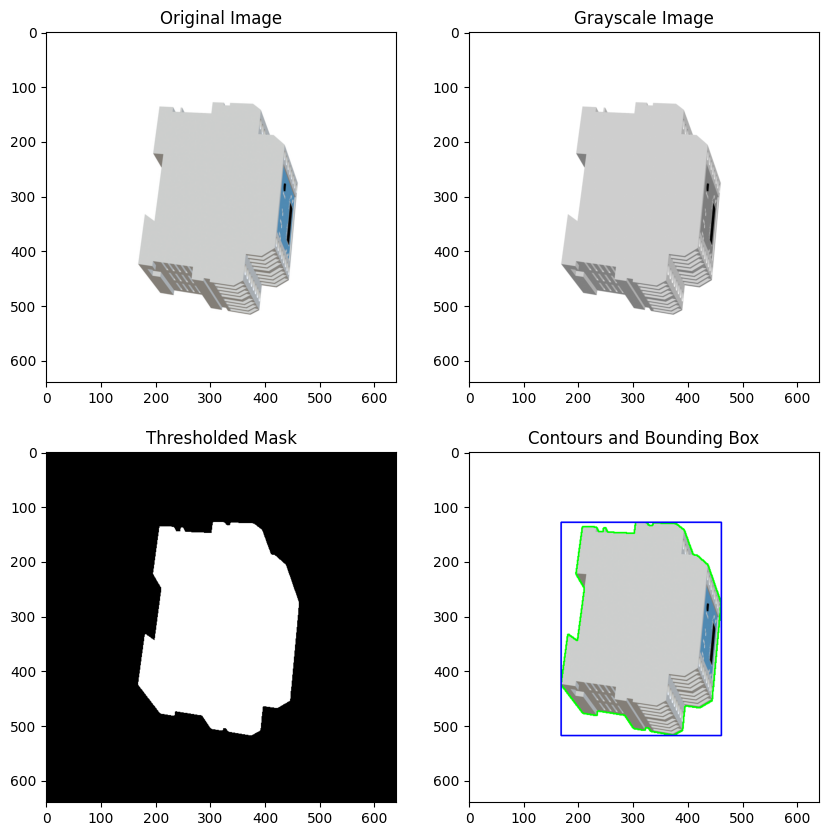

### **LOW COMPLEXITY:**

In [ ]:
import os
import cv2
import numpy as np

# Paths to the folders
image_folder = '/content/Datasets/LOW COMPLEXITY'
annotation_folder = '/content/Datasets/LOW COMPLEXITY_Annotations'

# Class mapping starting from 0
class_mapping = {
    'D1098590': 0,
    'D1100844': 1,
    'D1612695': 2,
    'D1899542': 3,
    'D4332268': 4,
}

# Ensure the annotation folder exists
os.makedirs(annotation_folder, exist_ok=True)

def extract_class_id(filename):
    # Extract the part of the filename corresponding to the class
    class_key = filename.split('_')[0]  # e.g., 'D1098590'
    class_id = class_mapping.get(class_key, -1)  # Get the class ID, default to -1 if not found
    if class_id == -1:
        raise ValueError(f"Class key {class_key} not found in class mapping.")
    return class_id

def get_yolo_annotation(image_path, annotation_path, class_id):
    # Read the image
    img = cv2.imread(image_path)
    img_height, img_width, _ = img.shape

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image to isolate non-white areas
    _, mask = cv2.threshold(blurred, 240, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print(f"No contours found in image {image_path}")
        return

    # Assume the largest contour is the object
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Convert to YOLO format
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    width = w / img_width
    height = h / img_height

    # Write the annotation to file
    with open(annotation_path, 'w') as f:
        f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

# Process all images in the folder
for image_name in os.listdir(image_folder):
    if image_name.endswith('.jpg') or image_name.endswith('.png'):
        image_path = os.path.join(image_folder, image_name)
        annotation_path = os.path.join(annotation_folder, image_name.replace('.jpg', '.txt').replace('.png', '.txt'))
        class_id = extract_class_id(image_name)
        get_yolo_annotation(image_path, annotation_path, class_id)

### **MEDIUM COMPLEXITY:**

In [ ]:
import os
import cv2
import numpy as np

# Paths to the folders
image_folder = '/content/Datasets/MEDIUM COMPLEXITY'
annotation_folder = '/content/Datasets/MEDIUM COMPLEXITY_Annotations'

# Class mapping starting from 0
class_mapping = {
    'D1098590': 0,
    'D1100844': 1,
    'D1612695': 2,
    'D1899542': 3,
    'D4332268': 4,
}

# Ensure the annotation folder exists
os.makedirs(annotation_folder, exist_ok=True)

def extract_class_id(filename):
    # Extract the part of the filename corresponding to the class
    class_key = filename.split('_')[0]  # e.g., 'D1098590'
    class_id = class_mapping.get(class_key, -1)  # Get the class ID, default to -1 if not found
    if class_id == -1:
        raise ValueError(f"Class key {class_key} not found in class mapping.")
    return class_id

def get_yolo_annotation(image_path, annotation_path, class_id):
    # Read the image
    img = cv2.imread(image_path)
    img_height, img_width, _ = img.shape

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image to isolate non-white areas
    _, mask = cv2.threshold(blurred, 240, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print(f"No contours found in image {image_path}")
        return

    # Assume the largest contour is the object
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Convert to YOLO format
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    width = w / img_width
    height = h / img_height

    # Write the annotation to file
    with open(annotation_path, 'w') as f:
        f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

# Process all images in the folder
for image_name in os.listdir(image_folder):
    if image_name.endswith('.jpg') or image_name.endswith('.png'):
        image_path = os.path.join(image_folder, image_name)
        annotation_path = os.path.join(annotation_folder, image_name.replace('.jpg', '.txt').replace('.png', '.txt'))
        class_id = extract_class_id(image_name)
        get_yolo_annotation(image_path, annotation_path, class_id)

# **VISUAL INSPECTION:**

### **LOW COMPLEXITY:**

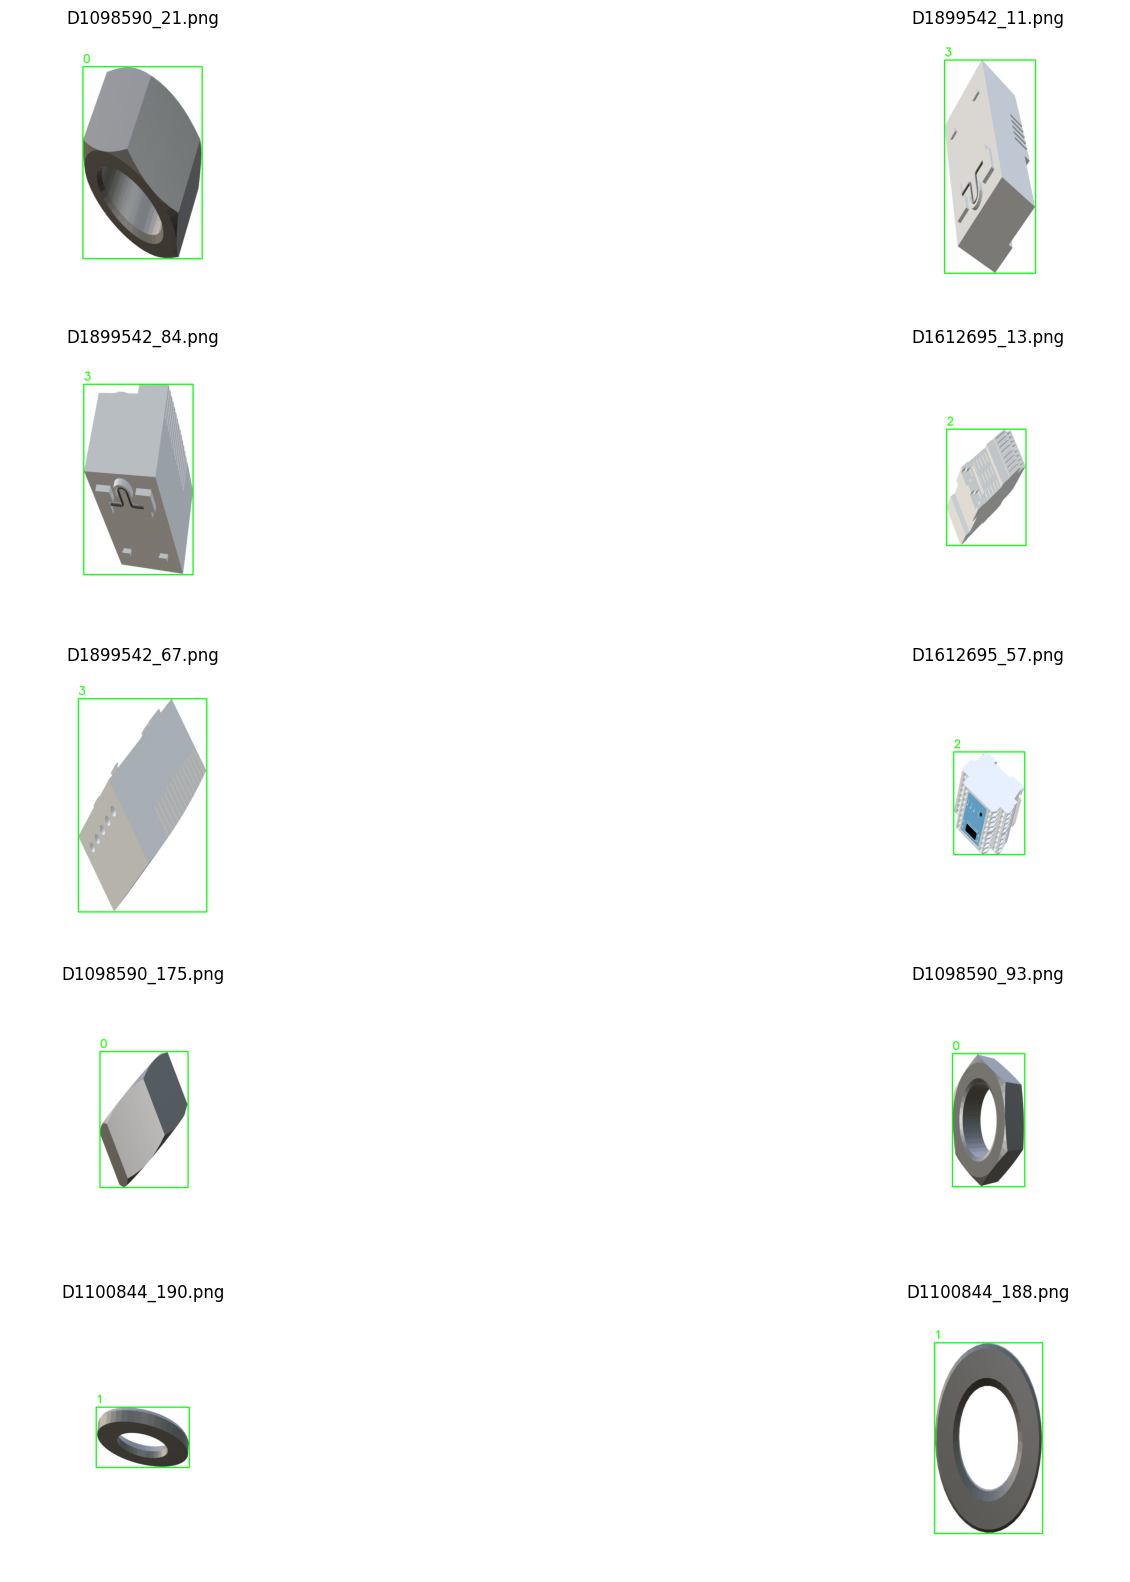

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Paths to the folders
image_folder = '/content/Datasets/LOW COMPLEXITY'
annotation_folder = '/content/Datasets/LOW COMPLEXITY_Annotations'

# Get list of all image files
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Select 10 random images
random_images = random.sample(image_files, 10)

def draw_bounding_box(img, bbox, label):
    x_center, y_center, width, height = bbox
    img_height, img_width, _ = img.shape
    x_min = int((x_center - width / 2) * img_width)
    y_min = int((y_center - height / 2) * img_height)
    x_max = int((x_center + width / 2) * img_width)
    y_max = int((y_center + height / 2) * img_height)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

def read_annotation(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        annotations = []
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            bbox = list(map(float, parts[1:]))
            annotations.append((class_id, bbox))
        return annotations

plt.figure(figsize=(20, 20))

for i, image_name in enumerate(random_images):
    image_path = os.path.join(image_folder, image_name)
    annotation_path = os.path.join(annotation_folder, image_name.replace('.jpg', '.txt').replace('.png', '.txt'))

    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Read annotations
    annotations = read_annotation(annotation_path)

    # Draw bounding boxes
    for annotation in annotations:
        class_id, bbox = annotation
        draw_bounding_box(img, bbox, str(class_id))

    # Display image with bounding boxes
    plt.subplot(5, 2, i + 1)
    plt.imshow(img)
    plt.title(image_name)
    plt.axis('off')

plt.show()

### **MEDIUM COMPLEXITY:**

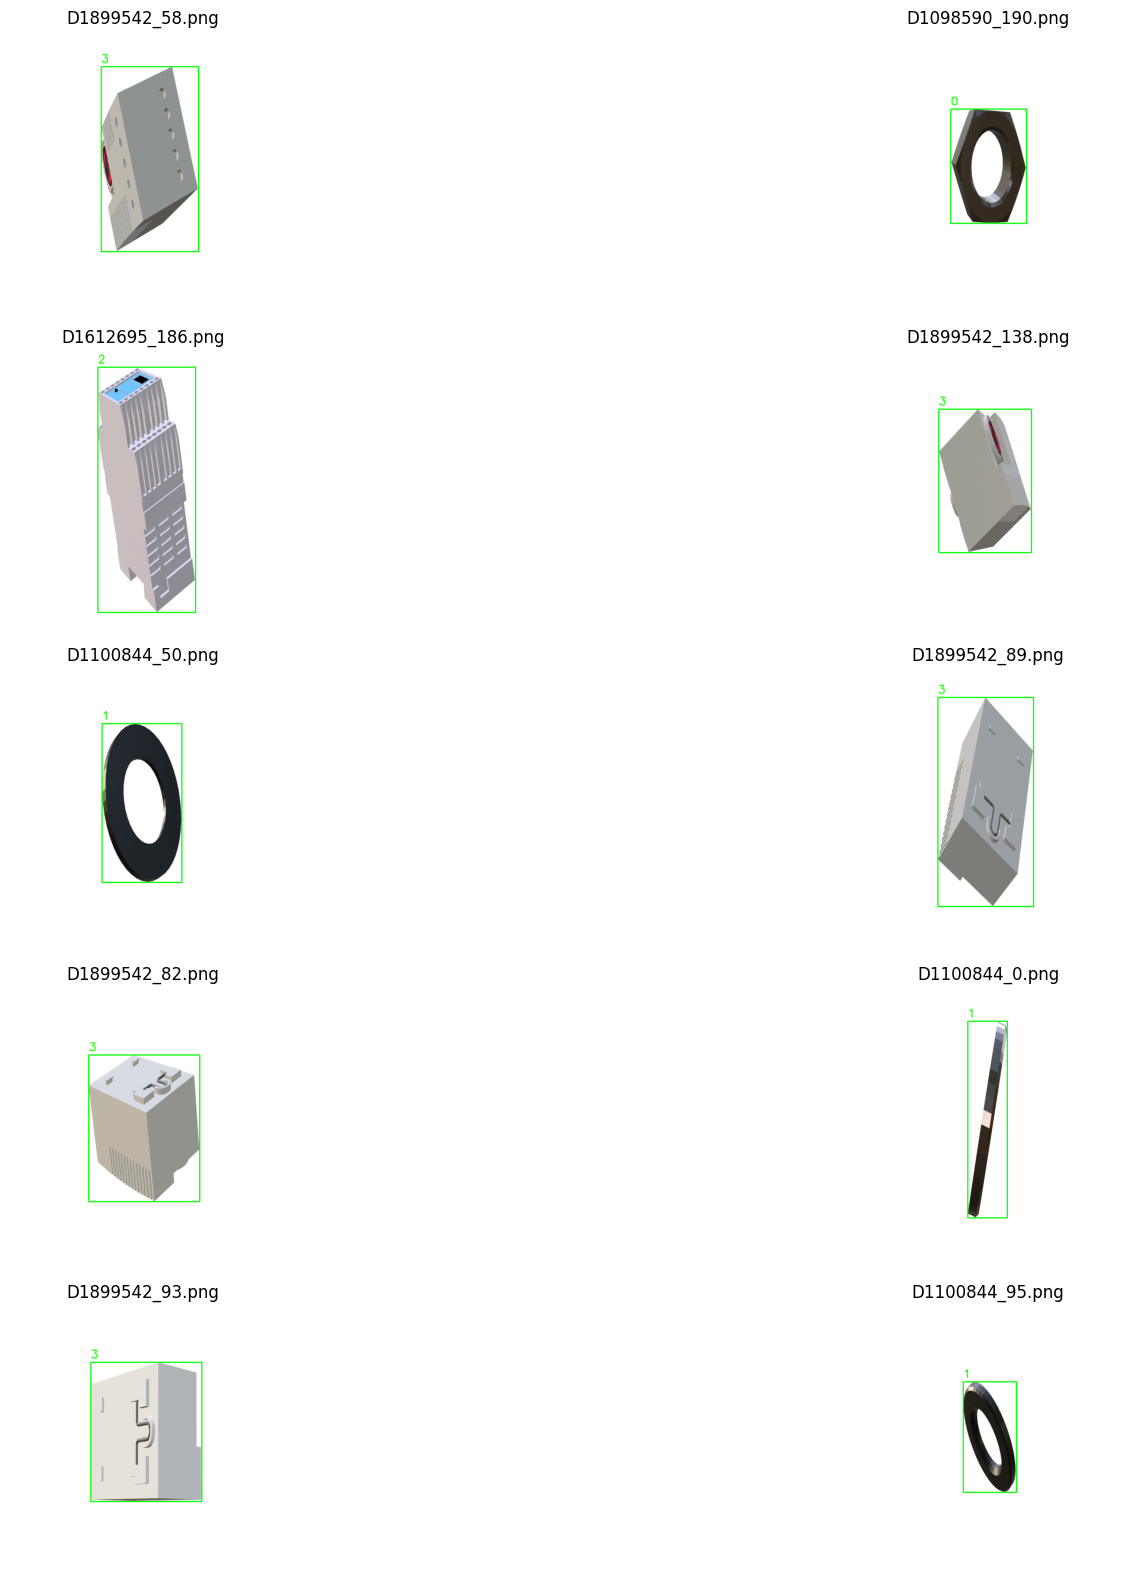

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Paths to the folders
image_folder = '/content/Datasets/MEDIUM COMPLEXITY'
annotation_folder = '/content/Datasets/MEDIUM COMPLEXITY_Annotations'

# Get list of all image files
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Select 10 random images
random_images = random.sample(image_files, 10)

def draw_bounding_box(img, bbox, label):
    x_center, y_center, width, height = bbox
    img_height, img_width, _ = img.shape
    x_min = int((x_center - width / 2) * img_width)
    y_min = int((y_center - height / 2) * img_height)
    x_max = int((x_center + width / 2) * img_width)
    y_max = int((y_center + height / 2) * img_height)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

def read_annotation(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        annotations = []
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            bbox = list(map(float, parts[1:]))
            annotations.append((class_id, bbox))
        return annotations

plt.figure(figsize=(20, 20))

for i, image_name in enumerate(random_images):
    image_path = os.path.join(image_folder, image_name)
    annotation_path = os.path.join(annotation_folder, image_name.replace('.jpg', '.txt').replace('.png', '.txt'))

    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Read annotations
    annotations = read_annotation(annotation_path)

    # Draw bounding boxes
    for annotation in annotations:
        class_id, bbox = annotation
        draw_bounding_box(img, bbox, str(class_id))

    # Display image with bounding boxes
    plt.subplot(5, 2, i + 1)
    plt.imshow(img)
    plt.title(image_name)
    plt.axis('off')

plt.show()

# **UPLOAD ANNOTATIONS:**

In [ ]:
import os
import shutil
from google.colab import files

def zip_and_upload_folder(folder_path, drive_path):
    # Zip the folder locally
    shutil.make_archive(folder_path, 'zip', folder_path)

    # Move the zip to Google Drive
    shutil.move(f"{folder_path}.zip", os.path.join(drive_path, f"{os.path.basename(folder_path)}.zip"))

# Folder paths on your local Colab
LOW_COMPLEXITY_Annotations = '/content/Datasets/LOW COMPLEXITY_Annotations'
MEDIUM_COMPLEXITY_Annotations = '/content/Datasets/MEDIUM COMPLEXITY_Annotations'

# Google Drive path
drive_folder_LOW = '/content/gdrive/My Drive/Colab Notebooks/Data/SYNTHETIC TESTING DATASET/LOW COMPLEXITY/Annotations'
drive_folder_MEDIUM = '/content/gdrive/My Drive/Colab Notebooks/Data/SYNTHETIC TESTING DATASET/MEDIUM COMPLEXITY/Annotations'

# Zip and upload folders
zip_and_upload_folder(LOW_COMPLEXITY_Annotations, drive_folder_LOW)
zip_and_upload_folder(MEDIUM_COMPLEXITY_Annotations, drive_folder_MEDIUM)